# The Automobile machine learning exercise (Continued)

## Learn Data Science by Doing!
[Link to Kaggle sklearn regression tutorial](https://www.kaggle.com/saadpd/linear-regression-sklearn/notebook)

### 1. Import Data
csv here is from ML studio

In [2]:
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv( 'data/automobile.csv')   # this data set is from Azure ML studio
data.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

### 2. Clean Missing Data and Feature Engineering

In [3]:
l_col_to_use = ['make','horsepower','length','price']
df = data.dropna(subset = l_col_to_use).loc[:, l_col_to_use]
df.head(3)

,make,horsepower,length,price
0,alfa-romero,111.0,168.8,13495.0
1,alfa-romero,111.0,168.8,16500.0
2,alfa-romero,154.0,171.2,16500.0


### Encoding categorical data
We need to convert the `make` categorial data into something we can regress  
[This link](https://www.datacamp.com/community/tutorials/categorical-data) from DataCamp offers 7 ways

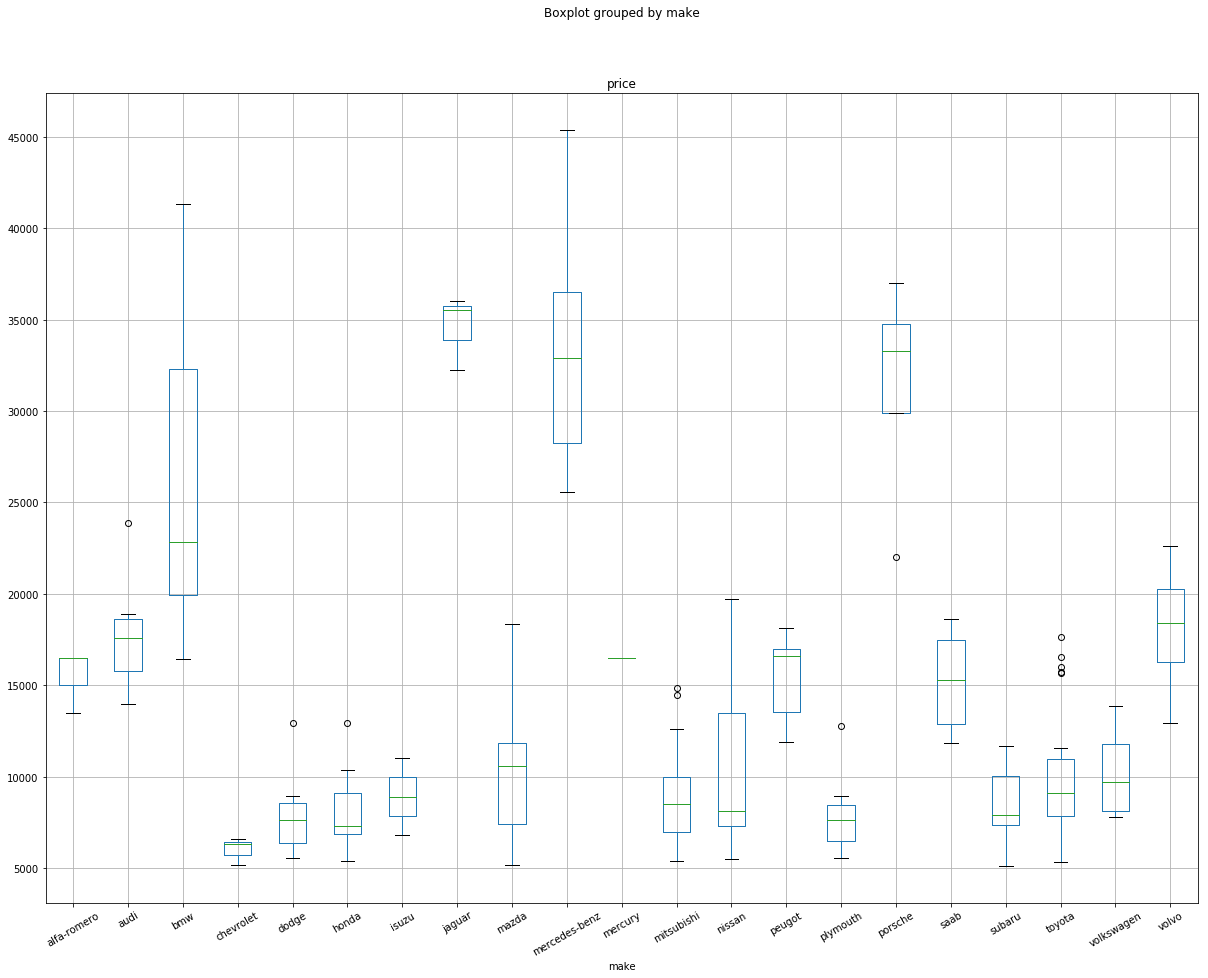

In [4]:
df.boxplot('price','make', rot = 30, figsize = (20,15))

#### Label Encoding

In [5]:
from sklearn.preprocessing import LabelEncoder
lb_maker = LabelEncoder()
df_lencode = df
df_lencode['make_code'] = lb_maker.fit_transform(df['make'])
df_lencode.sample(3)

,make,horsepower,length,price,make_code
71,mercedes-benz,155.0,202.6,34184.0,9
117,peugot,142.0,186.7,18150.0,13
59,mazda,84.0,177.8,8845.0,8


#### One-hot Encoding

In [6]:
df_onehot = pd.get_dummies(df, columns=['make'], prefix = ['make'])
df_onehot.sample(3)

,horsepower,length,price,make_code,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,...,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo
13,121.0,176.8,21105.0,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
127,207.0,168.9,34028.0,15,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
77,68.0,157.3,6189.0,11,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


### 3. Split Data
into training and test data  

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_onehot.drop(columns=['price']), df_onehot.price, test_size = 0.3, random_state = 0)

print(f'Test data shapes: {X_train.shape} {y_train.shape}')
print(f'Test data shapes: {X_test.shape} {y_test.shape}')

Test data shapes: (139, 24) (139,)
Test data shapes: (60, 24) (60,)


### 4. Train the Model
A decision tree [tutorial](https://stackabuse.com/decision-trees-in-python-with-scikit-learn/)

In [8]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
model = lm.fit(X_train, y_train)

# # let's compare it with decision tree
# from sklearn.tree import DecisionTreeRegressor
# regressor = DecisionTreeRegressor()
# tmodel = regressor.fit(X_train, y_train)

/Users/JHO/.virtualenvs/accelerateHK3/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


### 5. Score the Model

Linear Regression model Score: 0.889775966284009


Text(0,0.5,'Predictions')

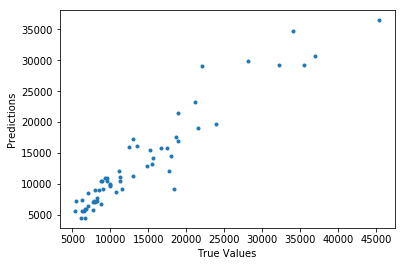

In [9]:
%matplotlib inline
from matplotlib import pyplot as plt
prediction = lm.predict(X_test)
score = lm.score(X_test, y_test)

print(f'Linear Regression model Score: {score}')
plt.plot(y_test, prediction, '.')
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [10]:
# tprediction = regressor.predict( X_test)
# tscore = regressor.score( X_test, y_test)

# print(f'Decision Tree Regression model Score: {tscore}')
# plt.plot(y_test, tprediction, '.')
# plt.xlabel('True Values')
# plt.ylabel('Predictions')

/Users/JHO/.virtualenvs/accelerateHK3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/JHO/.virtualenvs/accelerateHK3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


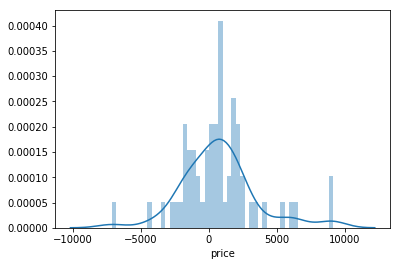

In [30]:
import seaborn as sns
sns.distplot( (y_test - prediction), bins = 50)

In [12]:
from sklearn.metrics import r2_score
from sklearn import metrics
import numpy as np

print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))
print("R2-score: %.2f" % r2_score(y_test , prediction) )

MAE: 2045.669060545451
MSE: 8266016.234869206
RMSE: 2875.0680400416973
R2-score: 0.89


### 6. Deploy the model

In [64]:
x_input = df_onehot.drop(columns=['price']).iloc[1,:]
x_input['horsepower'] = 112
x_input['length'] = 200
x_input['make_alfa-romero'] = 0
x_input['make_bmw'] = 1

test = lm.predict(x_input.to_frame().T)
test

array([24795.81069922])